<a href="https://colab.research.google.com/github/Ad603-tech/Deep-Learning-Projects/blob/main/Simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt


Generating some data

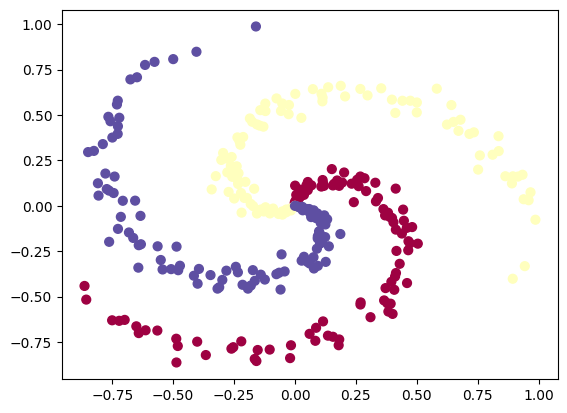

In [4]:
N = 100 # no. of points per class
D = 2 #dimensionality
K = 3 # no. of classses
X = np.zeros((N*K, D)) # data matrix( each row = singe eg)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j, N*(j+1))
  r = np.linspace(0.0, 1, N) # radius
  t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap=plt.cm.Spectral)
plt.show()

Training softmax linear classifier

In [17]:
# initialize parameters randomly
W = 0.01 *np.random.randn(D, K)
b = np.zeros((1, K))
step_size = 1e-0
reg = 1e-3

num_examples = X.shape[0]
for i in range(200):
  # compute the class scores for a linear classifier
   scores = np.dot(X, W) + b
   # get unnormalized probabilities
   exp_scores = np.exp(scores)
  # normalize them for each example
   probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims =True)
   correct_logprobs = -np.log(probs[range(num_examples),y])
   # compute the loss : avg cross-entropy loss and regularization
   data_loss = np.sum(correct_logprobs)/num_examples
   reg_loss= 0.5*reg*np.sum(W*W)
   loss = data_loss +reg_loss
   if i % 10 == 0:
    print("iteration %d: loss %f" % (i, loss))

  # compute the gradient on scores
   dscores = probs
   dscores[range(num_examples),y] -= 1
   dscores /= num_examples

   # backpropate the gradient to the parameters (W,b)
   dW = np.dot(X.T, dscores)
   db = np.sum(dscores, axis=0, keepdims=True)

   dW += reg*W # regularization gradient

   # perform a parameter update
   W += -step_size * dW
   b += -step_size * db




iteration 0: loss 1.099757
iteration 10: loss 0.911153
iteration 20: loss 0.841390
iteration 30: loss 0.809844
iteration 40: loss 0.793506
iteration 50: loss 0.784248
iteration 60: loss 0.778666
iteration 70: loss 0.775146
iteration 80: loss 0.772850
iteration 90: loss 0.771315
iteration 100: loss 0.770267
iteration 110: loss 0.769541
iteration 120: loss 0.769031
iteration 130: loss 0.768669
iteration 140: loss 0.768410
iteration 150: loss 0.768224
iteration 160: loss 0.768089
iteration 170: loss 0.767991
iteration 180: loss 0.767919
iteration 190: loss 0.767866


In [18]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' %(np.mean(predicted_class == y)))

training accuracy: 0.53


(-1.8621452713474562, 1.9778547286525472)

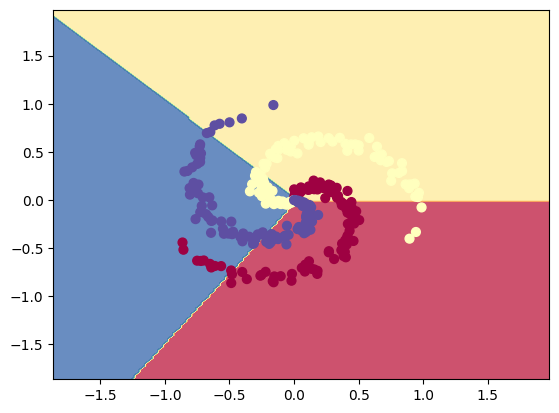

In [19]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')

Training a Neural Network

In [21]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 *np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

#gradient descent loop
num_examples = X.shape[0]
for i in range(10000):

  # evaluate class scores. [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W)+b) # ReLu activation
  scores = np.dot(hidden_layer, W2)+b2

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims = True) # NxK

  #compute the class: avg cross_entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples), y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print("iteration %d: loss %f" %(i, loss))

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples), y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims = True)

  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W

 # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098648
iteration 1000: loss 0.411079
iteration 2000: loss 0.274409
iteration 3000: loss 0.285522
iteration 4000: loss 0.255050
iteration 5000: loss 0.252139
iteration 6000: loss 0.251265
iteration 7000: loss 0.250841
iteration 8000: loss 0.250580
iteration 9000: loss 0.250401


In [23]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.98


(-1.8621452713474562, 1.9778547286525472)

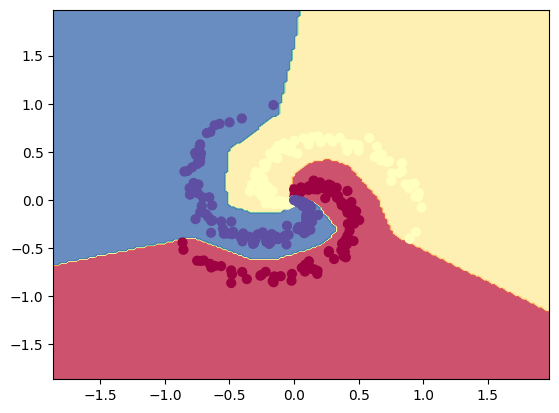

In [24]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')